# 3D Shape Similarity

Microsoft Kinect, Google's Project Tango and Lytro's light field camera are all examples of 3D depth sensing reaching the consumer market. As this technology becomes more widestream, new signal processing techniques are needed to exploit this data. Recent techniques in 3D shape similarity assesment present exciting opportunities to develop new algorithms in this area. 

Seneca, the Roman philosopher, said “While we teach, we learn,” and creating a tutorial on these topics is an excellent exercise to understand a complex subject that is at the heart of many modern computer vision techniques.

In this notebook, we will go through some basic concepts and algorithms in this field.

## Basic concepts in geometry

**Topological spaces**. A Topological space $(X, \tau)$ is a set $X$ on which a *topology* $\tau$ has been defined, that is, a collection of subsets of X called *open sets* and satisfying the following axioms:
- Both $X$ and the empty set are open sets
- Intersecting a finite number of open sets gives an open set
- Any union of open sets is still an open set

Example: $X = \{a,b,c,d\}$, $\tau = \{\emptyset,\{a,b,c,d\},\{a,b\},\{a,b,c\},\{c\}\}$

Now we will look at some special kinds of Topological spaces: **metric space** and **length space**.

One of the most fundamental concepts in geometry is the notion of **distance** and **metric space**:

A set $X$ equipped with a function $d : X \times X \rightarrow \mathbb{R}$ is said to be a metric space if the following axioms holds for all $x_1, x_2, x_3 \in X$:
- *Non-negativity*: $d(x_1, x_2)\geq0$
- *Indistinguishability*: $d(x_1, x_2)=0$ if and only if $x_1 = x_2$
- *Symmetry*: $d(x_1, x_2)=d(x_2, x_1)$
- *Triangle inequality*: $d(x_1, x_3)\leq d(x_1, x_2) + d(x_2, x_3)$

Example: $X = \{x_1, x_2, x_3\}$, where $x_1 = (0,0,0,0)$, $x_2 = (1,3,2,4)$ and $x_3 = (-2,4,-1,1)$. $d(x_1, x_2) = \|x_1 - x_2\|_4$ where $\|\mathbf{x}\|_4 = (\sum_{i=1}^{n}\left| x_i \right|^4)^{1/4}$. 

Indistinguishability can be easily checked. The other three properties are tested as below:

In [ ]:
import numpy as np
from numpy import linalg as LA
x1 = np.asarray([0,0,0,0]); x2 = np.asarray([1,3,2,4]); x3=np.asarray([-2,4,-1,1])
# compute the norm_4
d_12 = LA.norm(x1-x2,ord=4);d_13 = LA.norm(x1-x3,ord=4);d_23 = LA.norm(x2-x3,ord=4);d_21 = LA.norm(x2-x1,ord=4)
d_11 = LA.norm(x1-x1,ord=4);d_22 = LA.norm(x2-x2,ord=4);d_33 = LA.norm(x3-x3,ord=4)
# check non-negativity
if d_12>0 and d_13>0 and d_23>0:
    print('Non-negativity is satisfied')
# check symmetry
if d_12 == d_21:
    print('Symmetry is satisfied')
# check triangle inequality
if d_13 <= d_12+d_23:
    print('Triangle inequality is satisfied')

The metric quantifies the concepts of “near” and “far”. Obviously, the set of all near points falls into a *ball* of certain radius. This idea can be generalized as *open metric ball* (or simply an *open ball*) and *closed metric ball* (or simply *closed ball*). The definitions are as follows:
- *open ball*: let $x \in X$ and $r>0$, the set $B_r(x) = \{x^{'}\in X : d(x,x^{'})<r\}$ is called an *open ball*
- *closed ball*: let $x \in X$ and $r>0$, the set $\bar{B}_r(x) = \{x^{'}\in X : d(x,x^{'})\leq r\}$ is called an *closed ball*

The illustration is shown below:
<img src="pic/ball.png",width=600,height=600>

The notion of a ball allows defining *open sets*: a set $A \subset X$ is said to be open if for every point $x\in A$ there exists $\epsilon >0$ such that $B_{\epsilon}(x)\subset A$. *Closed sets* are defined as complements of open sets.

Through the definition of open and closed sets, the metric induces a *topology* on $X$, which is required to give a rigorous formulation of important properties such as convergence, connectedness, compactness and continuity. Let us first overview each of them and then we will give te definition of *topological spaces*.

A space is said to be *disconnected* if it is the union of two disjoint, nonempty, open sets; otherwise, it is said to be connected.

Example: A set $X = \{a,b,c,d\}$ and a topolopy $\tau = \{\{a\},\{b\},\{c\},\{d\},\{a,b\},\{c,d\}\}$ is disconnected since it is the union of two disjoint, nonempty and opn sets: $\{\{a\},\{b\},\{a,b\}\}$ and $\{\{c\},\{d\},\{c,d\}\}$. If we add one more set to $X$, such that $\tau = \{\{a\},\{b\},\{c\},\{d\},\{a,b\},\{c,d\},\{a,d\}\}$, then this space is connected. Alternatively, we can show the connectedness in a graph as below:
<img src="pic/connectedness.png",width=600,height=600>

A metric space $X$ is said to be *compact* if any collection of open sets $A_i \subset X$ that covers $X$ (i.e., $\cup A_i = X$) has a finite sub-collection that still covers $X$. 

Example: suppose $X = \{1,2,3\}$, one collections of open sets that covers $X$ is $\{1,2\},\{2,3\}$, the sub-collection of these two sets is $\{1\},\{2\},\{3\}$ which is finite.

A sequence $\{x_n\}_{n=1}^\infty$ of points in $X$ is said to be *converge* to a point $x\in X$ if for every $\epsilon >0$, there exists some $N$ such that $x_n\in B_\epsilon(x)$ for all $n\geq N$. There are many examples of convergent sequence, for instance, $X = \{\frac{1}{3^{n-1}}, n = 1,2,...\}$.

*Continuity*: $f$ is said to be continuous at a point $x$ if for every sequence$\{x_n\}$ in $X$ with the limit $x_n\rightarrow x$, the sequence $\{f(x_n)\}$ converges to $f(x)$. In metric spaces, $f: X\rightarrow Y$ can be seen as the correspondence between two metric spaces $(X, d_X)$ and $(Y, d_Y)$. Clearly, the distance $d_X(x_1, x_2)$ between a pair of points in $X$ is mapped to the distance $d_Y(f(x_1), f(x_2))$ between the images of $x_1$ and $x_2$ under $f$.

Example: $X = \{x_1, x_2, x_3\}$, where $x_1 = (0,0,0,0)$, $x_2 = (1,3,2,4)$ and $x_3 = (-2,4,-1,1)$. Assume $f(X) = \{\frac{1}{x_1},\frac{1}{x_2},\frac{1}{x_3}\}$. Then $f$ is not continuous since $f(x_1)=(\infty,\infty,\infty,\infty)$.

A bijective continuous map $f$ with a cntinuous inverse $f^{-1}$ is called a *homeomorphism*. For example, $f(x) = 2x$ and $f^{-1}(x) = \frac{1}{2}x$ are both continuous and hence this map is homeomorphic.

A property stronger than continuity is *Lipschitz continuity*: $f$ is said to be Lipschitz if there exists $C\geq0$ such that $d_Y(f(x_1), f(x_2))\leq C\cdot d_X(x_1, x_2)$ for all $x_1, x_2 \in X$. The smallest admissible $C$ is called the *Lipschitz constant* or the *dilation* of $f$ and is denoted by
\begin{equation}
\text{dil}\; f = \sup_{x_1\neq x_2\in X}  \frac{d_Y(f(x_1), f(x_2))}{d_X(x_1, x_2)}
\end{equation}

For real valued differentiable functions, a function $f: [a,b]\rightarrow \mathbb{R}$ is Lipschitz if its derivative $|f^{'}(x)|$ on $[a,b]$ is bounded and $\text{dil}\; f\leq \sup_{x\in[0,1]}|f^{'}(x)| $.

A stronger definition of Lipschitz continuity is *bi-Lipschitz continuity*: $f$ is said to be bi-Lipschitz if there exists a constant $C\geq 1$ such that $C^{-1}\cdot d_X(x_1, x_2)\leq d_Y(f(x_1), f(x_2)) \leq C\cdot d_X(x_1, x_2)$.

A bi-Lipschitz function $f$ with $C = 1$ is called *distance preserving*, because $d_Y(f(x_1), f(x_2))=d_X(x_1, x_2)$ for all $x_1,x_2\in X$. A bijective distance preserving map is called an $isometry$ and two metric spaces related by such a map are referred to as *isometric*.For example, funcction $f(x) = x + 1$ on $(-1,0)$ is an isometry. A particular case of isometries are maps of $X$ onto itself called *self-isometries*, denoted by **Iso(X)**.

There is a remarkable class of spaces with a high degree of symmetry called *homogenous*. A metric space is said to be homogenoous if for every $x_1,x_2\in X$ there exists a self-isometry $f: X\rightarrow X$ such that $f(x_1) = x_2$. Informally, this meas that no place in the space is privileged and it is impossibe to distingguish a particular element of $X$ from any other element.

A natural relaxation of isometry in this case is the notion of *almost isometry*: a function $f: X \rightarrow Y$ is said to be an almost isometry (or $\epsilon$-isometry) if there exists some $\epsilon\geq0$ such that $|d_Y(f(x_1), f(x_2))-d_X(x_1, x_2)|\leq\epsilon$ for all $x_1,x_2\in X$, and for every $y\in Y$ there exists $x\in X$ such that $d_Y(y,f(x))\leq\epsilon$. Clearly, a 0-isometry is a true isometry. It is also convenient to define the *distortion* of a map
\begin{equation}
\text{dis}\, f = \sup_{x_1, x_2\in X}|d_Y(f(x_1), f(x_2))-d_X(x_1, x_2)|
\end{equation}

Although it appears that passing from zero distortion to "almost zero" distortion leads to dramatic changes, if we were given the possibility of observing their behavior from a distance, we would see that on scales of distance significantly larger than $\epsilon$, $\epsilon$-isometry behave similarly to true isometries. Hence, we will use the notion of almost isometry throughout the notebook.

**Length space**.In many cases the notion of Euclidean distance is somehow ambiguous. For example, one can claim that the distance between Lausanne and Beijing is about eight thousand meter; however, we cannot travel along a straight tunnel dug through the Earch between the two cities. The conclusion is that in many cases, the notion of distance is born from the lengths of *pathss*. We define a path as a continuous map $\Gamma:[a,b]\rightarrow X$ of an interval.The length associate with a path $\Gamma$ is defined as $L(\Gamma)$. We can define a metric induced by te length as
\begin{equation}
d_L(x,y) = \inf_{\Gamma}\{L(\Gamma)\;\text{s.t.}\, \Gamma:[a,b]\rightarrow X, \Gamma(a) = x_1,\Gamma(b) = x_2\}
\end{equation}
Such a metric is called a *length metric* and a metric space $(X, d_L)$ is called a *length space*.

Here is an example of Euclidean distance and length of paths, the blue region is the defined region of $X$.
<img src="pic/path.png",width=600,height=600>

**Manifolds**.$\;$A space is said to be an $n$-dimensional manifold if every point in it has a neighborhood homeomorphic ot an open subset of $\mathbb{R}^n$. In other words, for every point $x$ on the manifold, there exists a map $\alpha:\,U_{\alpha}\rightarrow\mathbb{R}^n$ from an open neighborhood $U_{\alpha}$ of $x$ such that $U_{\alpha}$ is homeomorphic to $\alpha(U_{\alpha})$

**Embedded surfaces**: Manifolds can be found everywhere: surfaces of all tangible objects can be represented as smooth two-dimensional manifolds residing in the amboent three-dimensional Ruclidean space. Such manifolds are often referred to as *embedded surfaces*. Such surfaces can often be described by a smooth map: $U\rightarrow\mathbb{R}^3$ from a subset $U$ of $\mathbb{R}^2$ to the three-dimensional Euclidean space. The set $U$ is called a *parameterization domain* and the vector-valued function $x(u^1,u^2) = (x^1(u^1,u^2),x^2(u^1,u^2),x^3(u^1,u^2))$ a (global) *parameterization* or the *embedding* of the surface. The two-dimensional manifold formed by the image $X = x(U)$ of $U$ in $\mathbb{R}^3$ is referred as a parametric surface.

**Bending**: COnsider a Riemannian manifold $S$, whose metric is realized in $\mathbb{R}^3$ by the embedding $x: S\rightarrow\mathbb{R}^3$, that is, the intrinsic metric induced on the embedded surface $X = x(S)$ coincides with $d_S$. Let us assume that $S$ admits two wmbeddins $x$ and $y$. The map $f: \mathbb{R}^3\rightarrow\mathbb{R}^3$ defined by $f = y\circ x^{-1}$ describes the extrinsic deformation that we need to apply to $X$ in order to obtain $Y$. Such defoemation is called *bending* and a surface having a non-unique embedding is called *bendable*.

Here is one example:
<img src="pic/bending.png",width=600,height=600>
It is easy to transform one wine bottle into another by sawing off the bottle neck and welding it back "upside down."Now imagine that instead of glass the bottle is made of flexible, yet inelastic material. Trying to push the neck inside the bottle, we will soon realize that it is an impossible task, although the two versions of the bottle are isometric. That is, there is no way to turn the bottle neck upside down without distorting it - the only way to do so necessarily involves a cut. This experiment brings us to the notion of continuous bending. Two isometric
surfaces $X$ and $Y$ are called *applicable* or *continuously bendable* if there exists a family of bendings $\{f_{\lambda}\}_{\lambda=0}^1$ continuous with respect to $\lambda$, such that $f_0(X)=X$ and $f_1(X)=Y$.Physically, applicability means that given a surface $X$ realized as a thin shell of inelastic material, it can be pressed without tearing into a mold having the form of $Y$.

**Rigidity**: Along with bendable and continuously bendable surfaces, many other surfaces admit a unique embedding into $\mathbb{R}^3$ (of course, up to a Euclidean isometry). Such surfaces, whose extrinsic geometry is completely determined by the intrinsic one, are called *non-bendable* or *rigid*.

## Discrete geometry

Digital computers can only work with discrete data, i.e., data that can assume only distinct, separated values. In order to perform any computation on a surface, we have first to approximate it by some discrete representation. This section, we focus on building discrete approximations to surfaces.

The most basic problem in discrete surface representation is sampling. When we say that a surface X is sampled, we imply a finite discrete set of points $X^{'} = \{x_1, . . . , x_N \} \subseteq X$, called a point cloud. Obviously, there are infinitely many ways to produce a point cloud out of X, and the natural question is how to decide whether one sampling is better than another. Intuitively, we wish the sampling to be as dense as possible, in order to better represent the underlying surface. On the other hand, we need to keep in mind that the discrete representation is used by computer algorithms, and every additional point increases storage and computational complexity costs.

There are three ways of representing a discrete surface:
<img src="pic/sampling.png",width=600,height=600>

### Farthest point sampling (FPS)

The farthest point sampling can be discribed as follows:

**input** : metric space $(X, d_X )$, some initial point $x_1 \in X$ and the desired sampling radius $r_0$.

**output** : a sampling $X^{′} = \{x_1,...,x_N\}$.

**initialization**: $X^′ = \{x_1\}$, $d(x) = d_X(x,x_1)$.

**While** $r>r_0$ **do**

$\qquad$ Find the farthest point from $X^′$, $x^′ = \arg \max_{x\in X} d(x)$.

$\qquad$ Update the set of selected samples: $X^′ \leftarrow X^′ \cup \{x^′\}$.

$\qquad$ Update the distance function d(x),
\begin{equation}
d(x) \leftarrow \min_{x \in X} \{d(x),d_X(x,x^′)\}; \\
r \leftarrow \max_{x \in X} d(x).
\end{equation}

**end**

Here is an example:
<img src="pic/example_sampling.png",width=600,height=600>

Placement of research stations on the Antarctic continent according to the farthest point strategy with the intrinsic metric dX (progress of the algorithm is shown left to right, top to bottom after 1, 2, 3, 4, 5, and 20 iterations). Shades of gray and contours visualize the distance function d(x) from the samples after each iteration.

In many practical applications, farthest point sampling is employed to *subsample* a discrete surface with a given dense but not necessarily uniform sampling. Also note that in the farthest point sampling strategy we are not allowed to move the samples already placed and at each iteration can only add one point in the best way. As a consequence, FPS does not necessarily produce the optimal sampling.

### Voronoi tessellation

The sub-optimality of FPS leads us to the conclusion that we need a finer criterion for the sampling quality than just saying that $X^′$ is an *r-separated* and *r-covering*. A somewhat better point of view is to think of sampling as *representation*, consisting of replacing continuous regions on the surface by single representative points.

Taking $x_i$ from the sampling $X^′$, we may say that $x_i$ represents all the points on X that are closer to it than to any other point in $X^′$. Consequently, the sampling $X^′$ partitions the surface X into N regions,
\begin{equation}
V_i(X^′) = \{x \in X : d_X(x,x_i) < d_X(x,x_j),x_j \in X^′\}.
\end{equation}

The open set $V_i(X^′)$ is called the **Voronoi region** of $x_i$ with respect to $X^′$, and the collection of all Voronoi regions is called the **Voronoi decomposition** of the surface generated by $X^′$.

Here is one example of Voronoi tessellation:

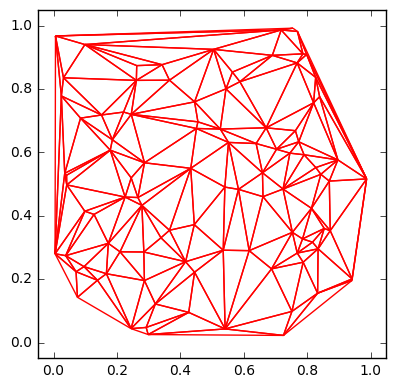

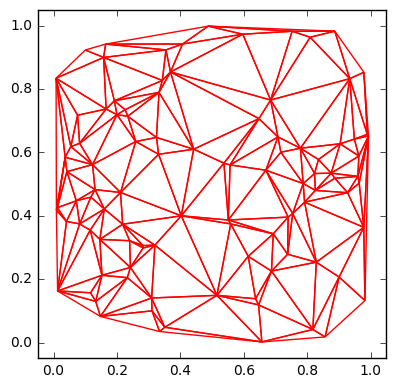

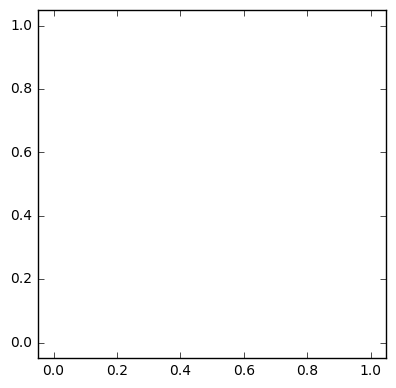

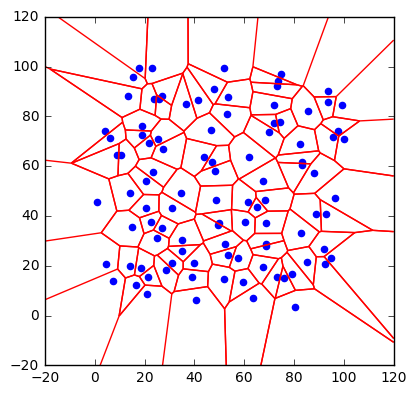

In [47]:
import sys
import numpy as np
import matplotlib.tri
import matplotlib.pyplot as plt
import time
 
def circumcircle2(T):
    P1,P2,P3=T[:,0], T[:,1], T[:,2]
    b = P2 - P1
    c = P3 - P1
    d=2*(b[:,0]*c[:,1]-b[:,1]*c[:,0])
    center_x=(c[:,1]*(np.square(b[:,0])+np.square(b[:,1]))- b[:,1]*(np.square(c[:,0])+np.square(c[:,1])))/d + P1[:,0]
    center_y=(b[:,0]*(np.square(c[:,0])+np.square(c[:,1]))- c[:,0]*(np.square(b[:,0])+np.square(b[:,1])))/d + P1[:,1]
    return np.array((center_x, center_y)).T
 
def check_outside(point, bbox):
    point=np.round(point, 4)
    return point[0]<bbox[0] or point[0]>bbox[2] or point[1]< bbox[1] or point[1]>bbox[3]
 
def move_point(start, end, bbox):
    vector=end-start
    c=calc_shift(start, vector, bbox)
    if c>0 and c<1:
        start=start+c*vector
        return start
 
def calc_shift(point, vector, bbox):
    c=sys.float_info.max
    for l,m in enumerate(bbox):
        a=(float(m)-point[l%2])/vector[l%2]
        if  a>0 and  not check_outside(point+a*vector, bbox):
            if abs(a)<abs(c):
                c=a
    return c if c<sys.float_info.max else None
 
def voronoi2(P, bbox=None):
    if not isinstance(P, np.ndarray):
        P=np.array(P)
    if not bbox:
        xmin=P[:,0].min()
        xmax=P[:,0].max()
        ymin=P[:,1].min()
        ymax=P[:,1].max()
        xrange=(xmax-xmin) * 0.3333333
        yrange=(ymax-ymin) * 0.3333333
        bbox=(xmin-xrange, ymin-yrange, xmax+xrange, ymax+yrange)
    bbox=np.round(bbox,4)
 
    D = matplotlib.tri.Triangulation(P[:,0],P[:,1])
    T = D.triangles
    n = T.shape[0]
    C = circumcircle2(P[T])
 
    segments = []
    for i in range(n):
        for j in range(3):
            k = D.neighbors[i][j]
            if k != -1:
                #cut segment to part in bbox
                start,end=C[i], C[k]
                if check_outside(start, bbox):
                    start=move_point(start,end, bbox)
                    if  start is None:
                        continue
                if check_outside(end, bbox):
                    end=move_point(end,start, bbox)
                    if  end is None:
                        continue
                segments.append( [start, end] )
            else:
                #ignore center outside of bbox
                if check_outside(C[i], bbox) :
                    continue
                first, second, third=P[T[i,j]], P[T[i,(j+1)%3]], P[T[i,(j+2)%3]]
                edge=np.array([first, second])
                vector=np.array([[0,1], [-1,0]]).dot(edge[1]-edge[0])
                line=lambda p: (p[0]-first[0])*(second[1]-first[1])/(second[0]-first[0])  -p[1] + first[1]
                orientation=np.sign(line(third))*np.sign( line(first+vector))
                if orientation>0:
                    vector=-orientation*vector
                c=calc_shift(C[i], vector, bbox)
                if c is not None:    
                    segments.append([C[i],C[i]+c*vector])
    return segments
 
if __name__=='__main__':
    points=np.random.rand(100,2)*100  
    lines=voronoi2(points, (-20,-20, 120, 120))
    plt.scatter(points[:,0], points[:,1], color="blue")
    lines = matplotlib.collections.LineCollection(lines, color='red')
    plt.gca().add_collection(lines)
    plt.axis((-20,120, -20,120))
    plt.show()

### Delaunay tessellation

Define the common Voronoi edge $V_{ij}$ by the edge between adjacent pair of points $x_i, x_j$. The corresponding con- nectivity graph can be realized by connecting each pair of adjacent points by a minimal geodesic $\Gamma_{ij} : [0,L] \rightarrow X$, which we assume to be parameterized by arclength.
Cutting the surface along the edges Γij splits it into tiles formed by the geodesic triangles (regions enclosed by Γij ), and if the surface has a boundary, additional tiles between the outmost edges and the boundary. In [248], Leibon and Letscher show that under the sampling density conditions that guarantee the existence of a Voronoi tessellation, these tiles form valid tessellation of the surface. Such a tessellation is called a Delaunay tessellation after the Russian mathematician Boris Delaunay (1890–1980),9 who first described it in 1934 [133]. The cells and the edges of a Dela

In [16]:
from scipy.spatial import Delaunay
tri = Delaunay(A)

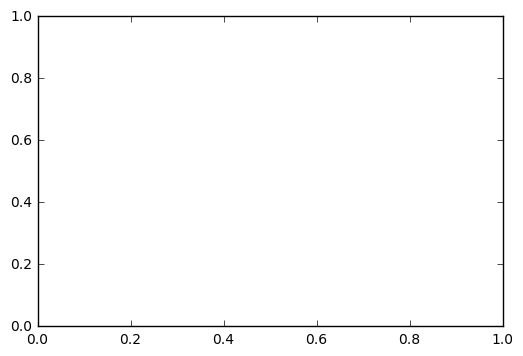

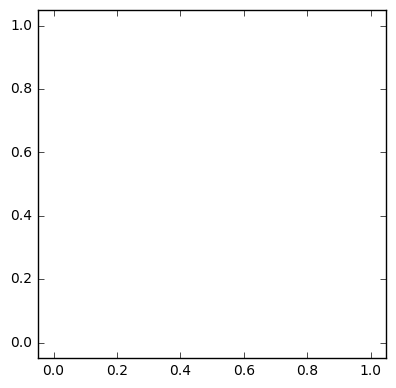

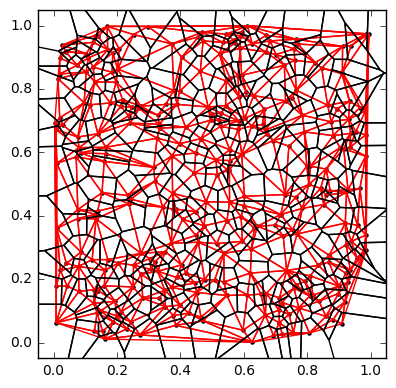

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.vertices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='r')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

if __name__ == '__main__':
    P = np.random.random((300,2))

    X,Y = P[:,0],P[:,1]

    fig = plt.figure(figsize=(4.5,4.5))
    axes = plt.subplot(1,1,1)

    plt.scatter(X, Y, marker='.')
    plt.axis([-0.05,1.05,-0.05,1.05])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='k')
    axes.add_collection(lines)
    plt.axis([-0.05,1.05,-0.05,1.05])
    plt.show()

## Iterative closest point (ICP) algorithm

In [58]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('qws', '0r90qkyloj')
import numpy as np

In [54]:
import numpy as np

def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform between corresponding 3D points A->B
    Input:
      A: Nx3 numpy array of corresponding 3D points
      B: Nx3 numpy array of corresponding 3D points
    Returns:
      T: 4x4 homogeneous transformation matrix
      R: 3x3 rotation matrix
      t: 3x1 column vector
    '''

    assert len(A) == len(B)

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[2,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(4)
    T[0:3, 0:3] = R
    T[0:3, 3] = t

    return T, R, t

def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nx3 array of points
        dst: Nx3 array of points
    Output:
        distances: Euclidean distances (errors) of the nearest neighbor
        indecies: dst indecies of the nearest neighbor
    '''

    indecies = np.zeros(src.shape[0], dtype=np.int)
    distances = np.zeros(src.shape[0])
    for i, s in enumerate(src):
        min_dist = np.inf
        for j, d in enumerate(dst):
            dist = np.linalg.norm(s-d)
            if dist < min_dist:
                min_dist = dist
                indecies[i] = j
                distances[i] = dist
    return distances, indecies

def icp(A, B, init_pose=None, max_iterations=20, tolerance=1e-3):
    '''
    The Iterative Closest Point method
    Input:
        A: Nx3 numpy array of source 3D points
        B: Nx3 numpy array of destination 3D point
        init_pose: 4x4 homogeneous transformation
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation
        distances: Euclidean distances (errors) of the nearest neighbor
    '''
    N = len(A)
    # make points homogeneous, copy them so as to maintain the originals
    src = np.ones((3,A.shape[0]))
    dst = np.ones((3,B.shape[0]))
    src[0:3,:] = np.copy(A.T)
    dst[0:3,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0
    # define a dic to store the source at each step
    dic = {}
    for i in range(max_iterations):
        print('at iteration:', i)
        dic[i] = src
        # find the nearest neighbours between the current source and destination points
        distances, indices = nearest_neighbor(src[0:3,:].T, dst[0:3,:].T)
        print('compute nearest neighbor finished')
        # compute the transformation between the current source and nearest destination points
        T, R, t = best_fit_transform(src[0:3,:].T, dst[0:3,indices].T)
        print('get the best fit trasform at current iteration')
        # update the current source
        src = R.dot(src) + np.tile(t[:,None], (1, N))

        # check error
        mean_error = np.sum(distances) / distances.size
        if abs(prev_error-mean_error) < tolerance:
            break
        prev_error = mean_error
        
        print('the error is:', prev_error)

    # calculcate final tranformation
    T, R, t = best_fit_transform(A, src[0:3,:].T)

    return T, distances, dic

In [ ]:
A = np.asarray([[2,3,0],[3,3,0],[4,3,0],[3,2,0],[3,1,0],[3,0,0]])
#B = np.asarray([[2,0,3],[3,0,3],[4,0,3],[3,0,2],[3,0,1],[3,0,0]])
B = np.asarray([[2+1,3/np.sqrt(2),3/np.sqrt(2)],
                 [3+1,3/np.sqrt(2),3/np.sqrt(2)],[4+1,3/np.sqrt(2),3/np.sqrt(2)],
                 [3+1,2/np.sqrt(2),2/np.sqrt(2)],[3+1,1/np.sqrt(2),1/np.sqrt(2)],[3+1,0,0]])

In [ ]:
T, distances, dic = icp(A, B)

In [ ]:
distances

In [ ]:
dic

In [ ]:
#def plot_3d_scatter(A,B):
A = dic[2].T
#B = np.asarray([[2,3,4],[3,3,4],[4,3,4],[3,2,3],[3,1,2],[3,0,1]])
trace1 = go.Scatter3d(
    x=A[:,0],
    y=A[:,1],
    z=A[:,2],
    mode='markers',
    marker=dict(
        size=6,
        symbol='star-square',
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=B[:,0],
    y=B[:,1],
    z=B[:,2],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=3,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

## Object reading

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def reading_text_vertex(path):
    vertice = list()
    polygon_edge = list()
    with open(path) as f:
        for line in f:
            if line.split()!=[] and line.split()[0] == 'v':
                vertice.append([float(x) for x in line.split()[1:4]])
            if line.split()!=[] and line.split()[0] == 'f':
                polygon_edge.append([float(x.split('/')[0]) for x in line.split()[1:]])
    vertice = np.asarray(vertice)
    polygon_edge = np.asarray(polygon_edge)
    return vertice, polygon_edge

In [69]:
# compute the (source, dest, weight) tuple, weight is represented by its 3D distance
def convert_to_edge(polygon_edge, vertice):
    # compute all the (source, dest) pair
    b = np.insert(polygon_edge, 3, values=polygon_edge[:,0], axis=1)
    b1 = b[:,0:2]; b2 = b[:,1:3]; b3 = b[:,2:]
    all_pair = np.insert(b1, len(b1), values=b2, axis=0)
    all_pair = np.insert(all_pair, len(all_pair), values=b3, axis=0)
    # compute the distance between each pair
    dis = np.zeros((len(all_pair),1))
    for i in range(len(all_pair)):
        dis[i,0] = np.linalg.norm(vertice[int(all_pair[i,0]-1),:] - vertice[int(all_pair[i,1]-1),:])
    edge = np.insert(all_pair, 2, values=dis[:,0], axis=1)
    return edge

In [70]:
import queue  
from collections import namedtuple

Edge = namedtuple('Edge', ['vertex', 'weight'])


class GraphUndirectedWeighted(object):  
    def __init__(self, vertex_count):
        self.vertex_count = vertex_count
        self.adjacency_list = [[] for _ in range(vertex_count)]

    def add_edge(self, source, dest, weight):
        assert source < self.vertex_count
        assert dest < self.vertex_count
        self.adjacency_list[source].append(Edge(dest, weight))
        self.adjacency_list[dest].append(Edge(source, weight))

    def get_edge(self, vertex):
        for e in self.adjacency_list[vertex]:
            yield e

    def get_vertex(self):
        for v in range(self.vertex_count):
            yield v


def dijkstra(graph, source, dest):  
    q = queue.PriorityQueue()
    parents = []
    distances = []
    start_weight = float("inf")

    for i in graph.get_vertex():
        weight = start_weight
        if source == i:
            weight = 0
        distances.append(weight)
        parents.append(None)

    q.put(([0, source]))

    while not q.empty():
        v_tuple = q.get()
        v = v_tuple[1]

        for e in graph.get_edge(v):
            candidate_distance = distances[v] + e.weight
            if distances[e.vertex] > candidate_distance:
                distances[e.vertex] = candidate_distance
                parents[e.vertex] = v
                # primitive but effective negative cycle detection
                if candidate_distance < -1000:
                    raise Exception("Negative cycle detected")
                q.put(([distances[e.vertex], e.vertex]))

    shortest_path = []
    end = dest
    while end is not None:
        shortest_path.append(end)
        end = parents[end]

    shortest_path.reverse()

    return shortest_path, distances[dest]

In [90]:
# build graph
def build_graph(vertice, edge):
    g = GraphUndirectedWeighted(len(vertice))
    for i in range(len(edge)):
        g.add_edge(int(edge[i,0]-1),int(edge[i,1]-1),edge[i,2])
    return g

In [92]:
# build distance matrix
def compute_distance_matrix(g, vertice):
    dis_matrix = np.zeros((len(vertice),len(vertice)))
    for i in range(len(vertice)):
        for j in range(len(vertice)):
            if j>=i:
                shortest_path, distance = dijkstra(g, i, j)
                dis_matrix[i,j] = distance
    dis_matrix = dis_matrix + dis_matrix.T
    return dis_matrix

In [93]:
# read object
vertice, polygon_edge = reading_text_vertex('objdata.txt')
# compute edge
edge = convert_to_edge(polygon_edge, vertice)
# build graph
g = build_graph(vertice, edge)
# build distance matrix
dis_matrix = compute_distance_matrix(g, vertice)
# vertice number
N = len(vertice)

In [ ]:
# furthest point sampling
r0 = 10
# r in the algorithm
r = 1e5
# the whole point set
total_point = np.arange(0,N)
# select initial sample
point_select = [np.random.randint(0, N-1)]
while r>r0:
    print(point_select)
    # find all point index that is not in point select
    search_point = np.delete(total_point,point_select)
    dis_max_previous = 0
    for j in point_select:
        dis_max = np.max(dis_matrix[j,search_point[:]])
        if dis_max > dis_max_previous:
            dis_max_previous = dis_max
            dis_max_index = np.argmax(dis_matrix[j,search_point[:]])
    # find the furthest point index
    
    point_select.append(dis_max_index)
    r = dis_max_previous
        

[172]
[172, 273]
[172, 273, 326]
[172, 273, 326, 272]
[172, 273, 326, 272, 271]
[172, 273, 326, 272, 271, 270]
[172, 273, 326, 272, 271, 270, 269]
[172, 273, 326, 272, 271, 270, 269, 268]
[172, 273, 326, 272, 271, 270, 269, 268, 267]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258]
[172, 273, 326, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257]
[172, 273, 326, 272, 271, 270, 

In [138]:
point_select

[292, 291]

In [134]:
np.delete(total_point,point_select)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array(None, dtype=object)

In [83]:
# randomly pick a vertice
point_select = np.random.randint(0, N-1)


62.377240702173331

In [55]:
# rotate the object
# define the rotate angle
theta1 = np.pi/3; theta2 = np.pi/6; theta3 = np.pi/4
# define the rotate matrix
R1 = np.array([[1,0,0],[0,np.cos(theta1), np.sin(theta1)],[0, -np.sin(theta1), np.cos(theta1)]])
R2 = np.array([[np.cos(theta3), np.sin(theta3), 0],[-np.sin(theta3), np.cos(theta3), 0], [0, 0, 1]])
R3 = np.array([[np.cos(theta2), 0, np.sin(theta2)], [0, 1, 0], [-np.sin(theta2), 0, np.cos(theta2)]])
# define the shifting matrix
t = np.array([2,4,1])[:,None]
B = np.transpose(R1.dot(R2).dot(R3).dot(np.transpose(A))+t)

In [56]:
A = vertice
A.shape
T, distances, dic = icp(A, B)


at iteration: 0
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 77.3969497887
at iteration: 1
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 23.2317191138
at iteration: 2
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 17.3165860958
at iteration: 3
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 15.721150627
at iteration: 4
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 14.5004977052
at iteration: 5
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 13.3598991915
at iteration: 6
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 12.3880795504
at iteration: 7
compute nearest neighbor finished
get the best fit trasform at current iteration
the error is: 11.2133303798
a

In [57]:
dic[0].shape


(3, 330)

In [59]:
A = np.transpose(dic[19])
#def plot_3d_scatter(A,B):
trace1 = go.Scatter3d(
    x=A[:,0],
    y=A[:,1],
    z=A[:,2],
    mode='markers',
    marker=dict(
        size=8,
        symbol='star-square',
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=2
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=B[:,0],
    y=B[:,1],
    z=B[:,2],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~qws/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
